<a href='https://www.hexnbit.com/'> <img src='https://www.hexnbit.com/wp-content/uploads/2019/09/hexnbit_final_66px.png'/> </a>

All cells must be suitably commented / documented.

# CAR SALES

This project is binary classification problem, where the chances of buying a car is Veryhigh(0),high(1),Medium(2) and Low(3).

### Read Dataset

In [1]:
import numpy as np  
import pandas as pd
from sklearn.metrics import classification_report, f1_score, confusion_matrix, log_loss,jaccard_score, accuracy_score
import matplotlib.pyplot as plt 
from sklearn.metrics import precision_score

In [2]:
header=["buying","maintainence","persons","doors","Luggage","Safety","Unacc"]
df=pd.read_csv(r"C:\Users\Shailja Rajpoot\OneDrive\Documents\Hexnbit\Summer Internship Project A\car.data",header=None,names=header, na_values="?"  )
df.head()

,buying,maintainence,persons,doors,Luggage,Safety,Unacc
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Check for Missing Data

In [3]:
print('Missing values in column:' )
df.isnull().sum()

Missing values in column:


buying          0
maintainence    0
persons         0
doors           0
Luggage         0
Safety          0
Unacc           0
dtype: int64

In [4]:
df.dtypes

buying          object
maintainence    object
persons         object
doors           object
Luggage         object
Safety          object
Unacc           object
dtype: object

### Handle Categorical Values

In [5]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,buying,maintainence,persons,doors,Luggage,Safety,Unacc
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
df['Code']=pd.factorize(df.buying)[0]
df['Codemaint']=pd.factorize(df.maintainence)[0]
df['Codeperosns']=pd.factorize(df.persons)[0]
df['Codedoors']=pd.factorize(df.doors)[0]
df['Codeluggage']=pd.factorize(df.Luggage)[0]
df['Codesafety']=pd.factorize(df.Safety)[0]

df.head()


,buying,maintainence,persons,doors,Luggage,Safety,Unacc,Code,Codemaint,Codeperosns,Codedoors,Codeluggage,Codesafety
0,vhigh,vhigh,2,2,small,low,unacc,0,0,0,0,0,0
1,vhigh,vhigh,2,2,small,med,unacc,0,0,0,0,0,1
2,vhigh,vhigh,2,2,small,high,unacc,0,0,0,0,0,2
3,vhigh,vhigh,2,2,med,low,unacc,0,0,0,0,1,0
4,vhigh,vhigh,2,2,med,med,unacc,0,0,0,0,1,1


In [7]:
df.tail()

,buying,maintainence,persons,doors,Luggage,Safety,Unacc,Code,Codemaint,Codeperosns,Codedoors,Codeluggage,Codesafety
1723,low,low,5more,more,med,med,good,3,3,3,2,1,1
1724,low,low,5more,more,med,high,vgood,3,3,3,2,1,2
1725,low,low,5more,more,big,low,unacc,3,3,3,2,2,0
1726,low,low,5more,more,big,med,good,3,3,3,2,2,1
1727,low,low,5more,more,big,high,vgood,3,3,3,2,2,2


### Split Data for Training and Testing

In [8]:
data = df
X=data.loc[:,[ 'Codemaint', 'Codeperosns', 'Codedoors', 'Codeluggage','Codesafety']]
print(X)


print(X.shape)

      Codemaint  Codeperosns  Codedoors  Codeluggage  Codesafety
0             0            0          0            0           0
1             0            0          0            0           1
2             0            0          0            0           2
3             0            0          0            1           0
4             0            0          0            1           1
...         ...          ...        ...          ...         ...
1723          3            3          2            1           1
1724          3            3          2            1           2
1725          3            3          2            2           0
1726          3            3          2            2           1
1727          3            3          2            2           2

[1728 rows x 5 columns]
(1728, 5)


In [9]:
Y=data[["Code"]]
print(Y)
print(Y.shape)

      Code
0        0
1        0
2        0
3        0
4        0
...    ...
1723     3
1724     3
1725     3
1726     3
1727     3

[1728 rows x 1 columns]
(1728, 1)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1382, 5) (346, 5) (1382, 1) (346, 1)


### Apply different Classification Algorithms and tune them

In [11]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, Y_train)

c:\users\shailja rajpoot\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [12]:
predict = model1.predict(X_test)
print((model1.score(X_test, Y_test)*100), "%")

19.942196531791907 %


In [13]:
#Evaluation metrics

In [14]:
print("Classification Report")
print(classification_report(Y_test, predict))
print("Confusion Matrix")
print(confusion_matrix(Y_test, predict))
print("Precision Score : ",precision_score(Y_test, predict, pos_label='positive',average='micro'))
print("F-1 score : ",f1_score(Y_test, predict, pos_label='positive',average='micro'))
print("Accuracy score : ",accuracy_score(Y_test, predict,))

Classification Report
              precision    recall  f1-score   support

           0       0.23      0.24      0.23        85
           1       0.16      0.22      0.19        83
           2       0.21      0.16      0.19        91
           3       0.21      0.18      0.19        87

    accuracy                           0.20       346
   macro avg       0.20      0.20      0.20       346
weighted avg       0.20      0.20      0.20       346

Confusion Matrix
[[20 27 17 21]
 [22 18 20 23]
 [22 36 15 18]
 [22 30 19 16]]
Precision Score :  0.1994219653179191
F-1 score :  0.1994219653179191
Accuracy score :  0.1994219653179191


c:\users\shailja rajpoot\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
c:\users\shailja rajpoot\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [15]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)

DecisionTreeClassifier()

In [16]:
predict2 = model2.predict(X_test)
print((model2.score(X_test, Y_test)*100), "%")

0.2890173410404624 %


In [17]:
#Evaluation metrics

In [18]:
print("Classification Report")
print(classification_report(Y_test, predict2))
print("Confusion Matrix")
print(confusion_matrix(Y_test, predict2))
print("Precision Score : ",precision_score(Y_test, predict2, pos_label='positive',average='micro'))
print("F-1 score : ",f1_score(Y_test, predict2, pos_label='positive',average='micro'))
print("Accuracy score : ",accuracy_score(Y_test, predict2,))

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.01      0.01        85
           1       0.00      0.00      0.00        83
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00        87

    accuracy                           0.00       346
   macro avg       0.00      0.00      0.00       346
weighted avg       0.00      0.00      0.00       346

Confusion Matrix
[[ 1 71 10  3]
 [70  0 10  3]
 [78 10  0  3]
 [68 18  1  0]]
Precision Score :  0.002890173410404624
F-1 score :  0.002890173410404624
Accuracy score :  0.002890173410404624


c:\users\shailja rajpoot\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
c:\users\shailja rajpoot\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [19]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(X_train, Y_train)

c:\users\shailja rajpoot\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [20]:
predict3 = model3.predict(X_test)
print((model3.score(X_test, Y_test)*100), "%")

10.404624277456648 %


In [21]:
#Evaluation Metrics

In [22]:
print("Classification Report")
print(classification_report(Y_test, predict3))
print("Confusion Matrix")
print(confusion_matrix(Y_test, predict3))
print("Precision Score : ",precision_score(Y_test, predict3, pos_label='positive',average='micro'))
print("F-1 score : ",f1_score(Y_test, predict3, pos_label='positive',average='micro'))
print("Accuracy score : ",accuracy_score(Y_test, predict3))

Classification Report
              precision    recall  f1-score   support

           0       0.11      0.13      0.12        85
           1       0.09      0.11      0.10        83
           2       0.12      0.04      0.06        91
           3       0.11      0.14      0.12        87

    accuracy                           0.10       346
   macro avg       0.11      0.10      0.10       346
weighted avg       0.11      0.10      0.10       346

Confusion Matrix
[[11 34  8 32]
 [26  9 12 36]
 [29 31  4 27]
 [37 29  9 12]]
Precision Score :  0.10404624277456648
F-1 score :  0.10404624277456648
Accuracy score :  0.10404624277456648


c:\users\shailja rajpoot\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
c:\users\shailja rajpoot\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [23]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model4.fit(X_train, Y_train)

<ipython-input-23-47bb56d95e0c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(X_train, Y_train)


RandomForestClassifier()

In [24]:
predict4 = model4.predict(X_test)
print((model4.score(X_test, Y_test)*100), "%")

0.2890173410404624 %


In [25]:
#Evaluation Metrics

In [26]:
print("Classification Report")
print(classification_report(Y_test, predict4))
print("Confusion Matrix")
print(confusion_matrix(Y_test, predict))
print("Precision Score : ",precision_score(Y_test, predict4, pos_label='positive',average='micro'))
print("F-1 score : ",f1_score(Y_test, predict4, pos_label='positive',average='micro'))
print("Accuracy score : ",accuracy_score(Y_test, predict4,))

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.00      0.00      0.00        83
           2       0.00      0.00      0.00        91
           3       0.01      0.01      0.01        87

    accuracy                           0.00       346
   macro avg       0.00      0.00      0.00       346
weighted avg       0.00      0.00      0.00       346

Confusion Matrix
[[20 27 17 21]
 [22 18 20 23]
 [22 36 15 18]
 [22 30 19 16]]
Precision Score :  0.002890173410404624
F-1 score :  0.002890173410404624
Accuracy score :  0.002890173410404624


c:\users\shailja rajpoot\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
c:\users\shailja rajpoot\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [27]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(X_train, Y_train)

c:\users\shailja rajpoot\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [28]:
predict5 = model5.predict(X_test)
print((model5.score(X_test, Y_test)*100), "%")

20.809248554913296 %


In [29]:
#Evaluation Metrics

In [30]:
print("Classification Report")
print(classification_report(Y_test, predict5))
print("Confusion Matrix")
print(confusion_matrix(Y_test, predict5))
print("Precision Score : ",precision_score(Y_test, predict5, pos_label='positive',average='micro'))
print("F-1 score : ",f1_score(Y_test, predict5, pos_label='positive',average='micro'))
print("Accuracy score : ",accuracy_score(Y_test, predict5,))

Classification Report
              precision    recall  f1-score   support

           0       0.21      0.21      0.21        85
           1       0.20      0.28      0.23        83
           2       0.19      0.15      0.17        91
           3       0.23      0.20      0.21        87

    accuracy                           0.21       346
   macro avg       0.21      0.21      0.21       346
weighted avg       0.21      0.21      0.21       346

Confusion Matrix
[[18 28 18 21]
 [23 23 20 17]
 [23 35 14 19]
 [23 27 20 17]]
Precision Score :  0.20809248554913296
F-1 score :  0.20809248554913296
Accuracy score :  0.20809248554913296


c:\users\shailja rajpoot\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
c:\users\shailja rajpoot\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [31]:
from sklearn.neighbors import KNeighborsClassifier
model6 = KNeighborsClassifier(4)
model6.fit(X_train, Y_train)

c:\users\shailja rajpoot\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [32]:
predict6 = model6.predict(X_test)
print((model6.score(X_test, Y_test)*100), "%")

5.491329479768786 %


In [33]:
#Evaluation metrics

In [34]:
print("Classification Report")
print(classification_report(Y_test, predict6))
print("Confusion Matrix")
print(confusion_matrix(Y_test, predict6))
print("Precision Score : ",precision_score(Y_test, predict6, pos_label='positive',average='micro'))
print("F-1 score : ",f1_score(Y_test, predict6, pos_label='positive',average='micro'))
print("Accuracy score : ",accuracy_score(Y_test, predict6,))

Classification Report
              precision    recall  f1-score   support

           0       0.11      0.19      0.14        85
           1       0.03      0.02      0.03        83
           2       0.00      0.00      0.00        91
           3       0.01      0.01      0.01        87

    accuracy                           0.05       346
   macro avg       0.04      0.06      0.05       346
weighted avg       0.04      0.05      0.04       346

Confusion Matrix
[[16 23 25 21]
 [39  2 22 20]
 [42 23  0 26]
 [45 21 20  1]]
Precision Score :  0.05491329479768786
F-1 score :  0.05491329479768786
Accuracy score :  0.05491329479768786


c:\users\shailja rajpoot\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
c:\users\shailja rajpoot\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


### Visually compare the performance of all classifiers

c:\users\shailja rajpoot\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\shailja rajpoot\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-35-511a4de9d543>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)
c:\users\shailja rajpoot\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was 

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifiers'>

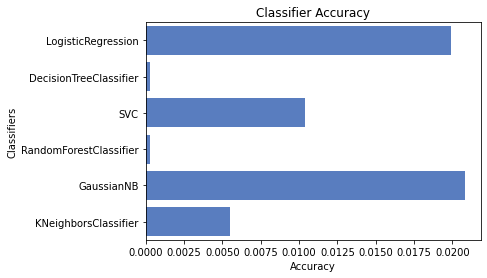

In [35]:
import seaborn as sns
classifiers = [model1, model2, model3,model4,model5,model6]
result_col = ["Classifiers", "Accuracy"]
result = pd.DataFrame(columns=result_col)
acc_dict = {}
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, Y_train)
    predictions = clf.predict(X_test)
    acc = accuracy_score(Y_test,predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc
        
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    result_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=result_col)
    result = result.append(result_entry)
    
    
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifiers', data=result, color="b")

In [36]:
result

,Classifiers,Accuracy
0,LogisticRegression,0.019942
0,DecisionTreeClassifier,0.000289
0,SVC,0.010405
0,RandomForestClassifier,0.000289
0,GaussianNB,0.020809
0,KNeighborsClassifier,0.005491


# The best classifier among above classifiers is Naive Bayes.